Temat projektu: Wypadki lotnicze w latach 1918 - 2022 (lotnictwo komercyjne). 
Źródło zbioru danych: https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data - dane z lat 1918 - 2022.




In [1]:
# Zaimportowanie podstawowych bibliotek oraz datasetu
import pandas as pd
import numpy as np

crashes = pd.read_csv('Plane Crashes.csv')

In [2]:
# Wyświetlenie pierwszych wierszy z wczytanego zbioru danych
crashes.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [3]:
# Sprawdzenie czy zbiór danych zawiera dane dla katastrof w Polsce 
print(crashes.loc[crashes['Country'] == 'Poland'])

             Date        Time                Aircraft  \
252    1921-02-18   10H 0M 0S            Junkers F.13   
545    1923-12-31         NaN            Junkers F.13   
566    1924-07-14         NaN         Blériot Spad 46   
707    1926-05-26         NaN                Potez 25   
846    1927-08-23         NaN            Junkers A.20   
...           ...         ...                     ...   
26926  2011-07-14  22H 30M 0S               ATR72-200   
26988  2011-11-01  14H 39M 0S          Boeing 767-300   
27443  2014-06-08  11H 15M 0S         PZL-Mielec AN-2   
27458  2014-07-05  16H 11M 0S  Piper PA-31-310 Navajo   
27841  2016-11-24   12H 5M 0S  Piper PA-31-310 Navajo   

                                               Operator Registration  \
252                                       Lloyd-Ostflug        D-128   
545                               Danziger Luftreederei        Dz.40   
566    Compagnie Franco-Roumaine de Navigation Aérienne       F-AEHU   
707                        

In [4]:
# Utworzenie nowej zmiennej zawierającej wiersze ze zbioru danych, gdzie kolumna 'Country' ma wartość 'Poland'
poland_data = crashes.loc[crashes['Country'] == 'Poland']

In [5]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
252,1921-02-18,10H 0M 0S,Junkers F.13,Lloyd-Ostflug,D-128,Flight,Charter/Taxi (Non Scheduled Revenue Flight),No,"Plain, Valley",Gdansk – Berlin,...,Poland,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was performing a flight from Gdansk t...,Human factor
545,1923-12-31,NaN,Junkers F.13,Danziger Luftreederei,Dz.40,Landing (descent or approach),Postal (mail),Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,1.0,0.0,0.0,0.0,0.0,0,The pilot was performing a mail flight. On app...,Unknown
566,1924-07-14,NaN,Blériot Spad 46,Compagnie Franco-Roumaine de Navigation Aérienne,F-AEHU,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Prague - Warsaw,...,Poland,Europe,1.0,0.0,3.0,0.0,0.0,0,Crashed on landing at Warsaw Airport. The airc...,Unknown
707,1926-05-26,NaN,Potez 25,Georges Pelletier-Doisy,Boby I,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The crew was engaged in a long flight from Par...,Other causes
846,1927-08-23,NaN,Junkers A.20,Deutsche Verkehrsfliegerschule - DVS,D-854,Flight,Training,No,"Plain, Valley",Berlin - Berlin,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,"The pilot, sole on board, departed Berlin-Staa...",Unknown


In [6]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.tail()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26926,2011-07-14,22H 30M 0S,ATR72-200,EuroLOT,SP-LFH,Taxiing,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Wroclaw – Warsaw,...,Poland,Europe,4.0,0.0,33.0,0.0,0.0,0,"On 14 July, 2011 ATR 72 flight crew after land...",Human factor
26988,2011-11-01,14H 39M 0S,Boeing 767-300,LOT Polish Airlines - Polskie Linie Lotnicze,SP-LPC,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Newark - Warsaw,...,Poland,Europe,10.0,0.0,221.0,0.0,0.0,0,"On November 1, 2011 a passenger LO 16 flight o...",Technical failure
27443,2014-06-08,11H 15M 0S,PZL-Mielec AN-2,Aeroklub Warminsko-Mazurski,SP-FDZ,Landing (descent or approach),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Olsztyn - Olsztyn,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The single engine aircraft was completing loca...,Human factor
27458,2014-07-05,16H 11M 0S,Piper PA-31-310 Navajo,Omega Skydiving School,N11WB,Takeoff (climb),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Czestochowa - Czestochowa,...,Poland,Europe,1.0,1.0,11.0,10.0,0.0,11,The twin engine aircraft was engaged in a seri...,Technical failure
27841,2016-11-24,12H 5M 0S,Piper PA-31-310 Navajo,Ger-Pol Air Taxi,D-IFBU,Takeoff (climb),Ferry,No,Airport (less than 10 km from airport),Zielona Góra - Nordhorn,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,While taking off from a grassy runway at Zielo...,Human factor


In [7]:
# Liczba dostępnych danych w każdej kolumnie dla Polski
poland_data.count()

Date                110
Time                 29
Aircraft            110
Operator            110
Registration        106
Flight phase         98
Flight type         108
Survivors            70
Crash site          100
Schedule             47
MSN                 104
YOM                  98
Flight no.            0
Crash location      110
Country             110
Region              110
Crew on board       110
Crew fatalities     110
Pax on board        110
PAX fatalities      110
Other fatalities    110
Total fatalities    110
Circumstances       110
Crash cause         110
dtype: int64

Etap projektu 3: 
Czyszczenie danych: Radzenie sobie z brakującymi wartościami, wartościami odstającymi i przygotowanie danych do analizy.


In [8]:
# Wyświetlenie informacji o danych
print('Informacje o danych:')
crashes.info()

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     2

In [9]:
print("Przykładowe dane:")
print(crashes.head())

Przykładowe dane:
         Date Time             Aircraft                           Operator  \
0  1918-05-02  NaN    De Havilland DH.4  United States Signal Corps - USSC   
1  1918-06-08  NaN  Handley Page V/1500  Handley Page Aircraft Company Ltd   
2  1918-06-11  NaN             Avro 504              Royal Air Force - RAF   
3  1918-06-19  NaN    De Havilland DH.4  United States Signal Corps - USSC   
4  1918-06-24  NaN           Breguet 14  French Air Force - Armée de l'Air   

  Registration                   Flight phase Flight type Survivors  \
0     AS-32084                Takeoff (climb)        Test        No   
1        E4104                Takeoff (climb)        Test       Yes   
2        A8544                         Flight    Training       Yes   
3     AS-32098                         Flight    Military        No   
4      AS-4130  Landing (descent or approach)    Military       Yes   

                               Crash site  \
0  Airport (less than 10 km from airport)

In [10]:
# Wyświetlenie statystyk opisowych
print('Statystyki opisowe (dla kolumn liczbowych):')
crashes.describe()

Statystyki opisowe (dla kolumn liczbowych):


,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


In [11]:
# Sprawdzenie braków danych w każdej kolumnie (procentowo)
missing_data = crashes.isnull().mean() * 100

# Wyświetlenie kolumn z brakującymi wartościami w kolejności malejącej
print("Procent brakujących danych w kolumnach:")
print(missing_data[missing_data > 0].sort_values(ascending=False))

Procent brakujących danych w kolumnach:
Flight no.          100.000000
Time                 51.117886
Schedule             31.349874
YOM                  18.611578
MSN                  14.655172
Survivors             4.545136
Registration          2.856041
Flight phase          2.235772
Crash site            1.342164
Flight type           0.199748
Pax on board          0.189235
Circumstances         0.087609
Crew on board         0.084104
Crash location        0.042052
Other fatalities      0.035043
Country               0.003504
Region                0.003504
Crew fatalities       0.003504
Aircraft              0.003504
PAX fatalities        0.003504
dtype: float64


In [12]:
# Co wiemy na ten moment? 
# W kolumnie 'Time' (czas wystąpienia zdarzenia) jest ponad 50% brakująych wartości - nie ma to znaczenia dla naszego projektu i może zostać usunięta.
# W kolumnie 'Flight no.' (numer lotu) brakuje informacji w 100%, podobnie jak 'Time' kolumna nie jest istotna dla projektu i może zostać usunieta. 
# W kolumnie 'Schedule' brakuje powyżej 30% wartości, ta kolumna też może zostać usunięta. 
# W następnym kroku zostaną usunięte wyżej wymienione kolumny - czyli te, gdzie brakuje powyżej 30% danych. 


# 'YOM' ma max "19657" - w takim roku na pewno nie został wyprodukowany samolot (jeszcze). W następnym kroku zamienię wartości odstające na brakujące dane (NaN). W dalszym etapie wartości NaN zostaną uzupełnione wartością "1901". "Akceptowalny" zakres produkcji samolotów to 1900-2022. 
# 'Crew on board' też ma odstającą wartość maksymalną, która raczej nie odzwierciedla stanu faktycznego. Wiersze z odstającymi wartościami do usunięcia w następnym roku. Zostanie nałożone ograniczenie do 50 osób w załodze. 

In [13]:
# Usunięcie kolumn z ponad 30% braków
columns_to_drop = ['Time', 'Flight no.', 'Schedule']
crashes = crashes.drop(columns=columns_to_drop)

print('Usunięto kolumny:')
print(columns_to_drop)

Usunięto kolumny:
['Time', 'Flight no.', 'Schedule']


In [14]:
# Zamiana wierszy z nielogicznymi wartościami w kolumnie 'YOM' 
crashes['YOM'] = crashes['YOM'].where((crashes['YOM'] >= 1900) & (crashes['YOM'] <= 2022), pd.NA)
print(f"Zmiana odstających wartości z nieprawidłowymi wartościami w kolumnie 'YOM'. Pozostała liczba wierszy: {len(crashes)}")

# Usunięcie wierszy z nielogicznymi wartościami w kolumnie 'Crew on board'
crashes = crashes[crashes['Crew on board'] <= 50]
print(f"Usunięto wiersze z nieprawidłowymi wartościami w kolumnie 'Crew on board'. Pozostała liczba wierszy: {len(crashes)}")

Zmiana odstających wartości z nieprawidłowymi wartościami w kolumnie 'YOM'. Pozostała liczba wierszy: 28536
Usunięto wiersze z nieprawidłowymi wartościami w kolumnie 'Crew on board'. Pozostała liczba wierszy: 28510


In [15]:
# Ponowne wyświetlenie statystyk opisowych po pierwszym czyszczeniu
print('Statystyki opisowe (dla kolumn liczbowych):')
crashes.describe()

Statystyki opisowe (dla kolumn liczbowych):


,YOM,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,22865.000000,28510.000000,28509.000000,28477.000000,28509.000000,28500.00000,28510.000000
mean,1959.072294,2.981515,1.773230,7.706500,3.683047,0.10986,5.572150
std,19.603585,2.824116,2.521153,24.068308,15.294745,2.64550,16.720028
min,1900.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1944.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1958.000000,2.000000,1.000000,0.000000,0.000000,0.00000,1.000000
75%,1974.000000,4.000000,3.000000,4.000000,1.000000,0.00000,5.000000
max,2020.000000,48.000000,25.000000,509.000000,506.000000,297.00000,520.000000


In [16]:
# Lista kolumn z danymi kategorycznymi, które są niezbędne w projekcie:
# - 'Aircraft': Model samolotu
# - 'Flight phase': Faza lotu, w której doszło do incydentu
# - 'Crash site': Miejsce katastrofy
# - 'Crash cause': Przyczyna wypadku
# W przypadku braków w tych kolumnach, zostaną one wypełnione w następnym etapie wartością 'Unknown', aby uniknąć usuwania wierszy i zachować pełny zestaw danych.

required_columns = ['Aircraft', 'Flight phase', 'Crash site', 'Country', 'Crash cause', 'Flight type']

In [17]:
# Wypełnienie brakujących wartości w kolumnach kategorycznych przypisanych do zmiennej 'required_columns'
for column in required_columns:
    crashes[column] = crashes[column].fillna('Unknown')

# Wyświetlamy komunikat o zakończeniu procesu uzupełniania braków.
print(f'Braki w najważniejszych kolumnach kategorycznych zostały uzupełnione wartością "Unknown". Pozostała liczba wierszy: {len(crashes)}')

Braki w najważniejszych kolumnach kategorycznych zostały uzupełnione wartością "Unknown". Pozostała liczba wierszy: 28510


In [18]:
# Identyfikacja kolumn liczbowych
numerical_columns = crashes.select_dtypes(include=['float64', 'int64']).columns

# Sprawdzenie braków danych w kolumnach liczbowych
missing_numerical = crashes[numerical_columns].isnull().sum()
print("Braki w kolumnach liczbowych przed czyszczeniem:")
print(missing_numerical[missing_numerical > 0])

Braki w kolumnach liczbowych przed czyszczeniem:
YOM                 5645
Crew fatalities        1
Pax on board          33
PAX fatalities         1
Other fatalities      10
dtype: int64


In [19]:
# Kolumny 'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities' przedstawiają dane dysktretne liczbowe - dotyczą informacji dotyczących załogi oraz pasażerów, zostaną wypełnione średnią, zaokrągloną do najbliższej liczby całkowitej.

# W przypadku kolumny 'YOM', brakujące wartości zostaną uzupełnione wartością "1901".

In [20]:
# Wypełnianie średnią dla kolumn liczbowych 

columns_to_fill_mean = ['Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities']

for column in columns_to_fill_mean:
    if column in crashes.columns and crashes[column].isnull().sum() > 0:
        mean_value = crashes[column].mean()
        rounded_mean = round(mean_value)
        crashes[column] = crashes[column].fillna(rounded_mean)
        print(f"Uzupełniono braki w kolumnie '{column}' zaokrągloną średnią: {rounded_mean}")

Uzupełniono braki w kolumnie 'Crew fatalities' zaokrągloną średnią: 2
Uzupełniono braki w kolumnie 'Pax on board' zaokrągloną średnią: 8
Uzupełniono braki w kolumnie 'PAX fatalities' zaokrągloną średnią: 4
Uzupełniono braki w kolumnie 'Other fatalities' zaokrągloną średnią: 0


In [21]:
# Uzupełnienie brakujących wartości w 'YOM' wartością 1901

crashes['YOM'] = crashes['YOM'].fillna(1901)

# Sprawdzenie, czy w kolumnie "YOM" pozostały braki
missing_yom= crashes['YOM'].isna().sum()
print(f"Pozostałe braki w 'YOM': {missing_yom}")

Pozostałe braki w 'YOM': 0


In [22]:
# Filtrowanie lotów komercyjnych:
# Uwzględniamy tylko 'Scheduled Revenue Flight' i 'Charter/Taxi (Non Scheduled Revenue Flight)'
commercial_flight_types = [
    'Scheduled Revenue Flight',
    'Charter/Taxi (Non Scheduled Revenue Flight)'
]
crashes = crashes[crashes['Flight type'].isin(commercial_flight_types)]

In [23]:
# Standaryzacja nazw krajów
crashes['Country'] = crashes['Country'].replace(
    {'United States of America': 'USA', 'United Kingdom': 'UK'}
)

In [24]:
# Utworzenie nowego pliku csv z oczyszczonymi danymi
crashes.to_csv("Cleaned_Historical_Crashes.csv", index=False)

In [25]:
# Wczytanie nowego pliku csv, na którym będzie oparta analiza
dataset = pd.read_csv("Cleaned_Historical_Crashes.csv")

Etap projektu 4:
Analiza danych: Przeprowadź dokładną analizę, koncentrując się na odkrywaniu zależności, trendów i wzorców. Metody analizy muszą być dostosowane do typu danych.
Przykłady:
- Dla szeregów czasowych, mogą pasować takie metody jak średnie kroczące, metody dekompozycji, itd. - Dla danych kategorycznych, można użyć jak tabele krzyżowe, test chi-kwadrat, itd.
- Dla danych ciągłych, możemy użyć analizę korelacji, regresję, itd.
(to są tylko przykłady ogólne, w konkretnych przypadkach mogą być użyte inne metody z uzasadnieniem)

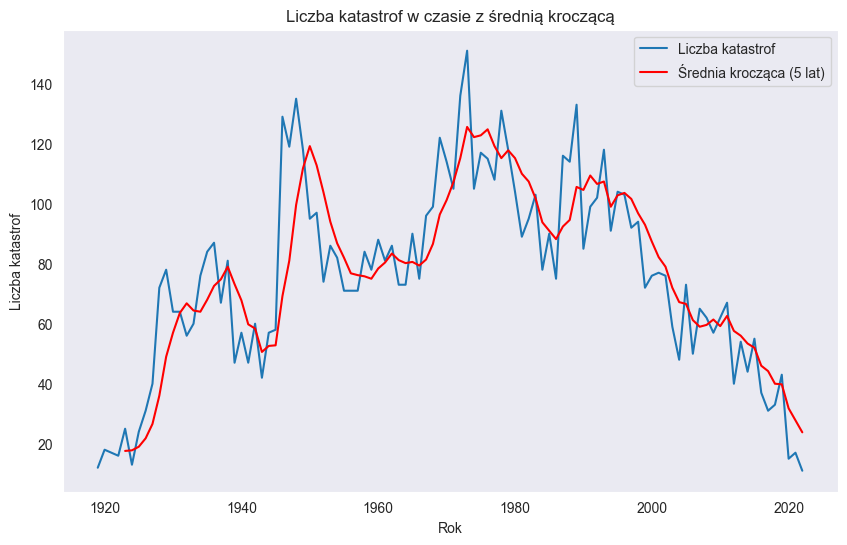

In [26]:
# Szereg czasowy - użycie średnich kroczącących oraz dekompozycje do analizy liczby katastrof w czasie

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Konwersja 'Date' na datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Grupowanie liczby katastrof rocznie
yearly_crashes = dataset['Date'].dt.year.value_counts().sort_index()

# Średnia krocząca (np. 5-letnia)
rolling_mean = yearly_crashes.rolling(window=5).mean()

# Wykres trendu i średniej kroczącej
plt.figure(figsize=(10, 6))
plt.plot(yearly_crashes.index, yearly_crashes.values, label='Liczba katastrof')
plt.plot(yearly_crashes.index, rolling_mean, label='Średnia krocząca (5 lat)', color='red')
plt.title('Liczba katastrof w czasie z średnią kroczącą')
plt.xlabel('Rok')
plt.ylabel('Liczba katastrof')
plt.legend()
plt.grid()
plt.show()

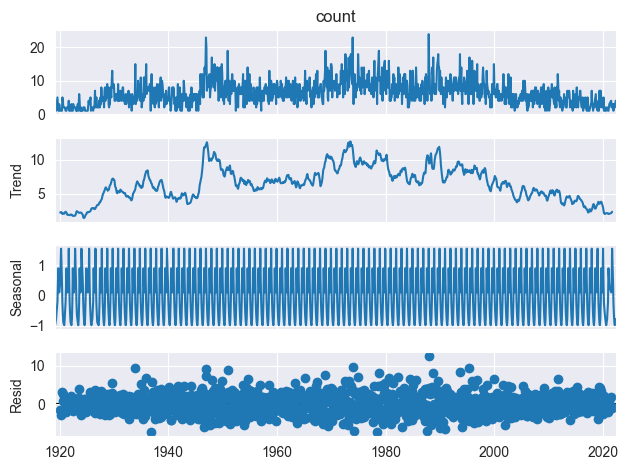

In [27]:
# Przygotowanie danych do dekompozycji (miesięczne dane)
monthly_crashes = dataset['Date'].dt.to_period('M').value_counts().sort_index()

# Konwersja na indeks czasowy
monthly_crashes.index = monthly_crashes.index.to_timestamp()

# Dekompozycja szeregów czasowych
decomposition = seasonal_decompose(monthly_crashes, model='additive', period=12)

# Wykres dekompozycji
decomposition.plot()
plt.show()

In [28]:
# Dane kategoryczne

from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# (ponowne) filtrowanie danych dla Polski
poland_data = dataset[dataset['Country'] == 'Poland']

# Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (ile katastrof związanych z konkretną przyczyną (crash cause) wystąpiło w różnych fazach lotu (flight phase)?)
crash_cause_vs_phase = pd.crosstab(poland_data['Crash cause'], poland_data['Flight phase'])

# Test chi-kwadrat (czy istnieje zaleznosc pomiedzy zmiennymi, jeśli p-wartość<0.05, zależność jest statystycznie istotna)
chi2, p, dof, expected = chi2_contingency(crash_cause_vs_phase)

# Wyświetlenie wyników
print("Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):")
print(crash_cause_vs_phase)
print(f"\nWyniki testu chi-kwadrat:")
print(f" - Wartość chi-kwadrat: {chi2:.2f}")
print(f" - p-wartość: {p:.4f}")
print(f" - Stopnie swobody: {dof}")

Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):
Flight phase       Flight  Landing (descent or approach)  Takeoff (climb)  \
Crash cause                                                                 
Human factor            3                              6                2   
Other causes            1                              0                0   
Technical failure       1                              4                0   
Unknown                 8                              9                0   
Weather                 2                              2                0   

Flight phase       Taxiing  Unknown  
Crash cause                          
Human factor             1        0  
Other causes             0        0  
Technical failure        0        0  
Unknown                  0        2  
Weather                  0        0  

Wyniki testu chi-kwadrat:
 - Wartość chi-kwadrat: 13.22
 - p-wartość: 0.6569
 - Stopnie swobody: 16


In [29]:
# Wyniki testu chi-kwadrat:
# - Tabela krzyżowa pokazuje liczbę katastrof z różnymi przyczynami (Crash cause) w różnych fazach lotu (Flight phase) w Polsce.
# - Wartość chi-kwadrat wynosi 13.22, a p-wartość to 0.6569.
# - Ponieważ p-wartość > 0.05, nie ma statystycznie istotnej zależności pomiędzy przyczynami katastrof a fazą lotu.
# - Oznacza to, że w analizowanych danych dla Polski przyczyny katastrof są niezależne od fazy lotu.

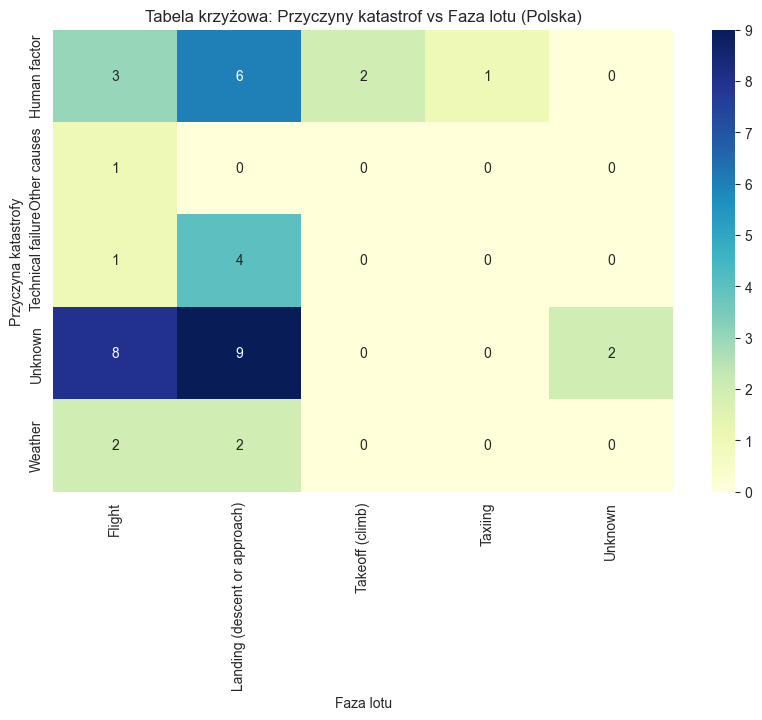

In [30]:
# Wizualizacja tabeli krzyżowej
plt.figure(figsize=(10, 6))
sns.heatmap(crash_cause_vs_phase, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska)')
plt.xlabel('Faza lotu')
plt.ylabel('Przyczyna katastrofy')
plt.show()

In [32]:
# Dane ciągłe
# Regresja - czy starsze samoloty są bardziej narażone na katastrofy z większą liczbą ofiar?

from sklearn.linear_model import LinearRegression
import numpy as np

# Dane do regresji
X = dataset[['YOM']].fillna(0)
y = dataset['Total fatalities']

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Obliczenie współczynnika R^2
r2_score = model.score(X, y)

# Współczynniki regresji
print(f"Współczynnik nachylenia (slope): {model.coef_[0]:.2f}")
print(f"Wyraz wolny (intercept): {model.intercept_:.2f}")
print(f"Współczynnik determinacji (R²): {r2_score:.4f}")

Współczynnik nachylenia (slope): 0.17
Wyraz wolny (intercept): -312.48
Współczynnik determinacji (R²): 0.0212


In [33]:
# Interpretacja wyników regresji liniowej:
# Współczynnik nachylenia (0.17) oznacza, że z każdym rokiem produkcji liczba ofiar wzrasta średnio o 0.17, ale efekt jest bardzo mały.
# Wyraz wolny (-312.48) sugeruje, że dla bardzo starych samolotów model przewidywałby ujemną liczbę ofiar, co jest nielogiczne i wskazuje na słabe dopasowanie modelu.
# Współczynnik determinacji (R² = 0.0212) jest bardzo niski, co oznacza, że model wyjaśnia tylko około 2.1% wariancji liczby ofiar katastrof.
# Tak niski R² sugeruje, że zależność między wiekiem samolotu a liczbą ofiar jest bardzo słaba lub praktycznie nie istnieje.
# Wniosek: Model regresji liniowej nie jest skuteczny w przewidywaniu liczby ofiar katastrof na podstawie roku produkcji samolotu

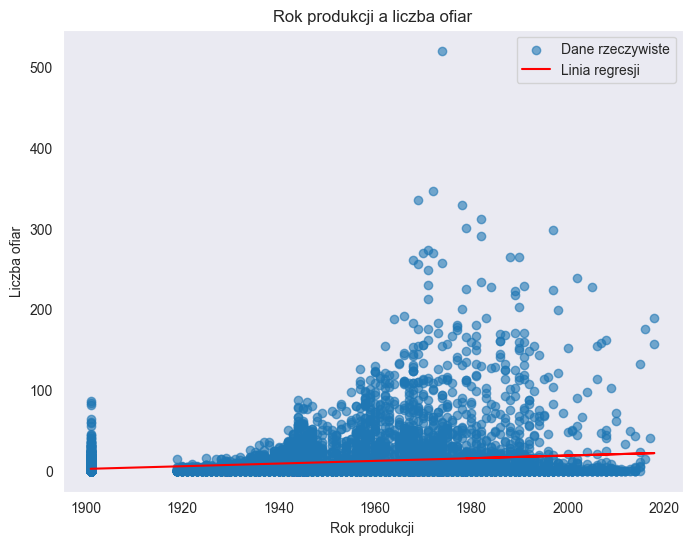

In [34]:
# Przewidywanie wartości
y_pred = model.predict(X)

# Wizualizacja regresji
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Dane rzeczywiste')
plt.plot(X, y_pred, color='red', label='Linia regresji')
plt.title('Rok produkcji a liczba ofiar')
plt.xlabel('Rok produkcji')
plt.ylabel('Liczba ofiar')
plt.legend()
plt.grid()
plt.show()

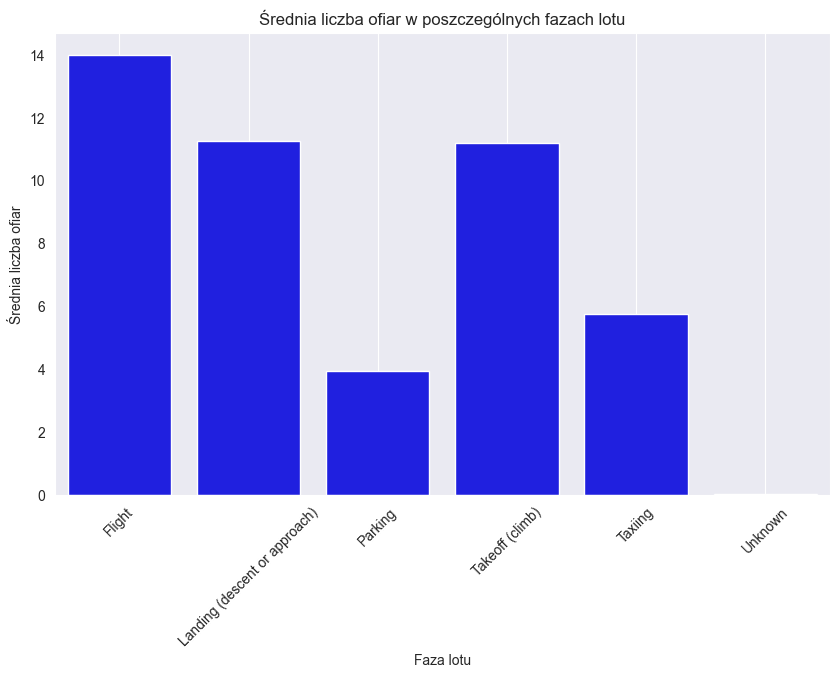

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grupowanie danych według fazy lotu i liczenie średniej liczby ofiar
phase_fatalities = dataset.groupby('Flight phase')['Total fatalities'].mean().reset_index()

# Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(data=phase_fatalities, x='Flight phase', y='Total fatalities', color='blue')
plt.title('Średnia liczba ofiar w poszczególnych fazach lotu')
plt.xlabel('Faza lotu')
plt.ylabel('Średnia liczba ofiar')
plt.xticks(rotation=45)
plt.grid()
plt.show()